In [1]:
import pandas as pd

# What kind of data does pandas handle?

I want to store data about the Owe Family. I know the names (characters), ages (integers) and sex (male/female) data.

To manually store data in a table, create a DataFrame. When using a python dictionary of lists, the dictionary keys will be used as column headers and the values in each list as columns of the DataFrame

In [10]:
table = pd.DataFrame({ "First Name": ['Paul', 'Flora', 'Charles'],
                        "Last Name": ['Owe', 'Owe', 'Owe'],
                      "Age" : [23, 55, 62],
                      "Gender": ['M', 'F', 'M'],
                      "NumericalValue": [4, 5, 7]
})

In [11]:
table

First Name Last Name  Age Gender  NumericalValue
0       Paul       Owe   23      M               4
1      Flora       Owe   55      F               5
2    Charles       Owe   62      M               7

A DataFrame is a 2D data structure that can store different types (including characters, integers, floating point values, categorical data, and more) in columns. It is similar to a spreadsheet

- The table has 4 columns, each with a label.
- The columns contain varying data types

# Each column in a DataFrame is a Series
If I am interested in only working with the column 'Age' then the result is a pandas Series.

pandas.Series is a 1D array with
- no column labels since it is just a single column of a DataFrame 
- row labels (axis labels more generally)

In [6]:
age = table['Age']
age

0    23
1    55
2    62
Name: Age, dtype: int64

### Doing something with a DataFrame or Series

1. Numerical data columns

In [7]:
age.max()

62

In [8]:
table['Age'].max()

62

In [31]:
age.describe()

count     3.000000
mean     46.666667
std      20.792627
min      23.000000
25%      39.000000
50%      55.000000
75%      58.500000
max      62.000000
Name: Age, dtype: float64

### Basic statistics of the numerical data of my data table

The describe() method provides a quick overview of the numerical data in a DataFrame. As the Name and Gender columns are textual data, these are by default not taken into account by the describe() method.

The describe() method is an example of a pandas operation returning a pandas Series.

To return descriptions of categorical data as well use include ='all'


In [18]:
table.describe(include='all')

First Name Last Name        Age Gender  NumericalValue
count           3         3   3.000000      3        3.000000
unique          3         1        NaN      2             NaN
top          Paul       Owe        NaN      M             NaN
freq            1         3        NaN      2             NaN
mean          NaN       NaN  46.666667    NaN        5.333333
std           NaN       NaN  20.792627    NaN        1.527525
min           NaN       NaN  23.000000    NaN        4.000000
25%           NaN       NaN  39.000000    NaN        4.500000
50%           NaN       NaN  55.000000    NaN        5.000000
75%           NaN       NaN  58.500000    NaN        6.000000
max           NaN       NaN  62.000000    NaN        7.000000

### Index of min/max values
- np.random.rand(dimensions you want) e.g 
    - (5) for 1d array 
    - (10,10) for 10x10 table 
- 

In [6]:
import pandas as pd
import numpy as np
series = pd.Series(np.random.randint(5, 10, size=10)) #Because this is a series, it should be 1D, therefore the 5,10 is the range of the random integer numbers
series

0    5
1    9
2    6
3    5
4    7
5    5
6    6
7    8
8    8
9    5
dtype: int64

In [11]:
series.idxmin() #returns the row index of the min value in this series (first occurence if more than one index exists)


#OF COURSE you can also do this:

#matrix = pd.DataFrame(np.random.rand(10,10), columns=["Y","Y","Y","Y","Y","Y","Y","Y","Y","Y"], index=["N","N","N","N","N","N","N","N","N","N"])




0

In [107]:
series.idxmax() # returns the row index of the max value

2

In [42]:
minmaxtup = (series.idxmin(), series.idxmax()) # return tuple

In [43]:
type(minmaxtup) #check data structure type

tuple

In [48]:
df1 = pd.DataFrame(np.random.rand(10,3), columns=['A', 'B', 'C'])
df1

A         B         C
0  0.095803  0.369123  0.581003
1  0.817196  0.215704  0.505916
2  0.790969  0.915751  0.092745
3  0.747852  0.431381  0.062471
4  0.711546  0.960447  0.396770
5  0.762769  0.414231  0.890260
6  0.854709  0.720684  0.237903
7  0.521635  0.506520  0.928568
8  0.930458  0.980075  0.904294
9  0.266603  0.142774  0.751435

In [49]:
df1.describe()

A          B          C
count  10.000000  10.000000  10.000000
mean    0.649954   0.565669   0.535137
std     0.271840   0.308866   0.332254
min     0.095803   0.142774   0.062471
25%     0.569113   0.380400   0.277619
50%     0.755311   0.468951   0.543460
75%     0.810639   0.866984   0.855554
max     0.930458   0.980075   0.928568

In [54]:
df1.idxmax(axis = 0)

A    8
B    8
C    7
dtype: int64

In [55]:
df1.idxmax(axis = 1) # 1 is the default for Series objects

0    C
1    A
2    B
3    A
4    B
5    C
6    A
7    C
8    B
9    C
dtype: object

When there are multiple rows (or columns) matching the minimum or maximum value, idxmin() and idxmax() return the first matching index:

In [72]:
df3 = pd.DataFrame(np.random.rand(5, 3), columns=["BTC", "XRP", "ETH"], index=['2016', '2017', '2018', '2019', '2020'])
df3

BTC       XRP       ETH
2016  0.584376  0.461360  0.378404
2017  0.137682  0.395550  0.038617
2018  0.484206  0.768187  0.779915
2019  0.306003  0.915917  0.667770
2020  0.120737  0.213725  0.510873

In [61]:
type(df3)

pandas.core.frame.DataFrame

In [73]:
ser3th = pd.Series(df3['ETH'])
type(ser3th)

pandas.core.series.Series

In [74]:
ser3th

2016    0.378404
2017    0.038617
2018    0.779915
2019    0.667770
2020    0.510873
Name: ETH, dtype: float64

In [77]:
ser3th.idxmax()

'2018'

Which year (between 2016 - 2020) did each coin achieve its all time best performance?

In [93]:
df3.idxmax(axis = 0)

BTC    2016
XRP    2019
ETH    2018
dtype: object

Now visualize the trend of these coins in terms of value over the 5 years

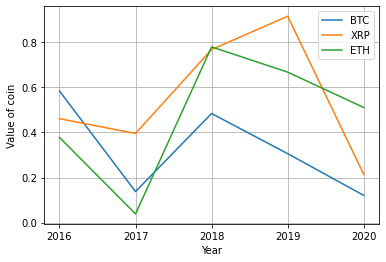

In [92]:
plt.xlabel('Year')
plt.ylabel('Value of coin')
plt.grid()
plt.plot(df3.index, df3)
plt.legend(['BTC', 'XRP', 'ETH'])
plt.show()

### Value Counts (histogramming) / mode

The value_count() Series method and top level function computes a histogram of a 1d array of values. It can also be used as afunction on regular arrays

#### Note
Creates a 1D numpy array, of specified size with random integers between a user specified range of values -> np.random.randint(min-int-value, max-int-value, size=size of array)

In [2]:
import numpy as np
data = np.random.randint(1, 12, size=10) #1D array
data

array([ 4,  9,  3,  2,  4,  6,  2,  1,  7, 11])

In [4]:
import pandas as pd
s = pd.Series(data)
s

0     4
1     9
2     3
3     2
4     4
5     6
6     2
7     1
8     7
9    11
dtype: int64

In [120]:
s.value_counts()

4     3
6     2
5     1
7     1
9     1
10    1
11    1
dtype: int64

In [128]:
data = pd.DataFrame(data)

#df3 has various columns. Here we are checking for value counts of entire rows
# can be used to detect duplicate rows
df3.value_counts()

BTC       XRP       ETH     
0.120737  0.213725  0.510873    1
0.137682  0.395550  0.038617    1
0.306003  0.915917  0.667770    1
0.484206  0.768187  0.779915    1
0.584376  0.461360  0.378404    1
dtype: int64

In [13]:
#Proof that it can detect duplicates
duplitrix = pd.DataFrame({'Col1': [4,3,4],
                          'Col2': [5,4,6],
                          'Col3': [4,3,4]
                         })
duplitrix.value_counts()
duplitrix

Col1  Col2  Col3
0     4     5     4
1     3     4     3
2     4     6     4

You can use this to even calculate frequent itemsets in transactional databases.

Value count looks at the index (or row) values and counts frequency of each row/index

## Quick copy file example using os command and shutil

In [196]:
!pwd
from shutil import copyfile
import os
os.chdir('SalesAnalytics/')
copyfile('all_data.csv', '../pandas-pandas/all_data.csv')

/Users/pcowe/Desktop


'../pandas-pandas/all_data.csv'

# How do I read and write tabular data?
Pandas provides the *read_csv()* function to read data stored as a CSV -> pandas DataFrame

Pandas supports many different file formats out of the box such as 
  - Excel
  - sql
  - json
  - parquet
  
Each have the prefix *read_**

In [22]:
import pandas as pd
sales = pd.read_csv("all_data.csv")
sales.head(8)

Order ID                Product Quantity Ordered Price Each      Order Date  \
0   295665     Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666     LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667   USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668       27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669   USB-C Charging Cable                1      11.95  12/18/19 12:38   
5   295670  AA Batteries (4-pack)                1       3.84  12/31/19 22:58   
6   295671   USB-C Charging Cable                1      11.95  12/16/19 15:10   
7   295672   USB-C Charging Cable                2      11.95  12/13/19 09:29   

                            Purchase Address  
0     136 Church St, New York City, NY 10001  
1        562 2nd St, New York City, NY 10001  
2       277 Main St, New York City, NY 10001  
3        410 6th St, San Francisco, CA 94016  
4              43 Hill St, Atlanta, GA 30301  
5  200 Jefferson St, New York City, NY 10001  
6            928 12th St, Portland, OR 97035  
7           813 Hickory St, Dallas, TX 75001

In [23]:
sales.tail(10)

Order ID                   Product Quantity Ordered Price Each  \
186839   222901    AAA Batteries (4-pack)                1       2.99   
186840   222902  Lightning Charging Cable                1      14.95   
186841   222903                    iPhone                1        700   
186842   222903  Lightning Charging Cable                1      14.95   
186843   222904        Macbook Pro Laptop                1       1700   
186844   222905    AAA Batteries (4-pack)                1       2.99   
186845   222906          27in FHD Monitor                1     149.99   
186846   222907      USB-C Charging Cable                1      11.95   
186847   222908      USB-C Charging Cable                1      11.95   
186848   222909    AAA Batteries (4-pack)                1       2.99   

            Order Date                         Purchase Address  
186839  06/11/19 04:00          891 South St, Atlanta, GA 30301  
186840  06/10/19 17:43           847 Main St, Atlanta, GA 30301  
186841  06/07/19 22:21  685 Hickory St, New York City, NY 10001  
186842  06/07/19 22:21  685 Hickory St, New York City, NY 10001  
186843  06/09/19 22:07        975 2nd St, Los Angeles, CA 90001  
186844  06/07/19 19:02            795 Pine St, Boston, MA 02215  
186845  06/01/19 19:29    495 North St, New York City, NY 10001  
186846  06/22/19 18:57    319 Ridge St, San Francisco, CA 94016  
186847  06/26/19 18:35     916 Main St, San Francisco, CA 94016  
186848  06/25/19 14:33           209 11th St, Atlanta, GA 30301

In [24]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Whereas read_* functions are used to read data to pandas,
the to_* methods are used to store data.

- to_excel()

In [25]:
sales.to_excel('sales.xlsx', sheet_name="sales", index=False)

This method stores our sales data as an excel file.

By setting index=False, the row index labels are not saved in the spreadsheet.

In [26]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Selecting a subset of your data

In [27]:
sales[["Product", "Price Each"]]

Product Price Each
0           Macbook Pro Laptop       1700
1           LG Washing Machine      600.0
2         USB-C Charging Cable      11.95
3             27in FHD Monitor     149.99
4         USB-C Charging Cable      11.95
...                        ...        ...
186844  AAA Batteries (4-pack)       2.99
186845        27in FHD Monitor     149.99
186846    USB-C Charging Cable      11.95
186847    USB-C Charging Cable      11.95
186848  AAA Batteries (4-pack)       2.99

[186849 rows x 2 columns]

In [28]:
sales[["Order ID", "Order Date"]].shape

(186849, 2)

## Filter specific rows
Filter for products with price over $200

In [29]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [33]:
sales['Price Each'] = sales['Price Each'].astype(float)

ValueError: could not convert string to float: 'Price Each'

In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [32]:
prod_above200 = sales[sales["Price Each"] > 200]

TypeError: '>' not supported between instances of 'str' and 'int'